# Radar / Spider chart plot function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## utils - fixed

In [2]:
def scale_transform_skip_inner_most_ring(original_scale, my_data):
    """
    original_scale: i.e., [1,2,3,4,5] -> (1, 5) -> (2, 5), skip inner most ring
    my_scale: i.e., [0.15, 0.15, 0.17, 0.16, 0.22, 0.15] -> (0.22, 0.15) reverse order
    """
    original_scale_min = original_scale[1] # skip inner most ring
    original_scale_max = original_scale[-1]
    
    original_range = original_scale_max - original_scale_min  # 5 - 2 = 3
    my_range = max(my_data) - min(my_data)

    # large is better, reverse scaling
    my_data_scaled = -1.0 * (original_range/my_range) * (my_data - min(my_data)) + original_scale_max
    my_scale = -1.0 * (my_range / original_range) * (original_scale - original_scale_min) + max(my_data)
    
    
    return (my_scale, my_data_scaled)

## radar plot class - fixed

In [3]:
class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.num_rings = len(labels[0])
        self.angles = np.arange(0, 360, 360.0/self.n)

        # rotate the angles of all axies by 90 degress
        self.angles = self.angles + 90
        self.angles = [a if a < 360.0 else a - 360 for a in self.angles]
    
        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]    
        self.ax = self.axes[0]
        self.ax.tick_params(pad=60)
        # self.ax.set_thetagrids(self.angles, labels=title, fontsize=15) # remove polar axis annotation label
        self.ax.set_thetagrids(self.angles)
        

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            
            ax.set_rgrids(range(1, self.num_rings + 1), angle=angle, labels=label, fontsize=20)
            
            # ax.spines['polar'].set_visible(False)
            ax.set_ylim(0, self.num_rings)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        self.ax.fill(angle, values, *args, color=kw['color'],alpha=kw['alpha']*0.05)

## polar axes labels - fixed

In [4]:
tit = [
    'Error / ImageNet', 'Severity / ImageNet', 'HD@1 / ImageNet',
    'Error / SUN-324', 'Severity / SUN-324', 'HD@1 / SUN-324',
    'Error / CUB-200', 'Severity / CUB-200', 'HD@1 / CUB-200',
    'Error / UCF-101', 'Severity / UCF-101', 'HD@1 / UCF-101',
    'Error / Food-101', 'Severity / Food-101', 'HD@1 / Food-101', 
]


legends = [
    'LP', 'AP', 'G',
    'LP+AP', 'AP+G', 'LP+G',
    'LP+AP+G \n (Ours)',
]


colors = [
    'red', 'green', 'purple',
    'orange', 'gray', 'hotpink',
    'blue',
]

markers = [
    '-<', '->', '-^',
    '-v', '-x', '-P',
    '-s',
]

## validation set radar chart
- top1 accuracy is converted to top1 error rate

In [5]:
# food-101
data_1_val = [
    [100 - 90.81, 2.45, 0.23], # LP (Leaf peers)
    [100 - 91.39, 2.51, 0.22], # AP (Ancestor peers)
    [100 - 88.37, 2.65, 0.31], # G (path-based Generic prompt)
    [100 - 91.24, 2.50, 0.22], # LP + AP
    [100 - 91.03, 2.55, 0.23], # AP + G
    [100 - 90.73, 2.50, 0.23], # LP + G
    [100 - 91.07, 2.51, 0.22], # LP + AP + G (ours)
]
data_1_val = np.transpose(np.array(data_1_val))

# ucf-101
data_2_val = [
    [100 - 75.63, 1.51, 0.37], # LP (Leaf peers)
    [100 - 76.92, 1.70, 0.39], # AP (Ancestor peers)
    [100 - 76.26, 1.60, 0.38], # G (path-based Generic prompt)
    [100 - 78.42, 1.57, 0.34], # LP + AP
    [100 - 79.58, 1.61, 0.33], # AP + G
    [100 - 79.65, 1.54, 0.31], # LP + G
    [100 - 79.76, 1.55, 0.31], # LP + AP + G (ours)
]
data_2_val = np.transpose(np.array(data_2_val))

# cub-200
data_3_val = [
    [100 - 59.80, 1.18, 0.47], # LP (Leaf peers)
    [100 - 65.03, 1.18, 0.41], # AP (Ancestor peers)
    [100 - 62.15, 1.19, 0.45], # G (path-based Generic prompt)
    [100 - 64.85, 1.17, 0.41], # LP + AP
    [100 - 66.03, 1.19, 0.41], # AP + G
    [100 - 64.58, 1.18, 0.42], # LP + G
    [100 - 65.77, 1.18, 0.41], # LP + AP + G (ours)
]
data_3_val = np.transpose(np.array(data_3_val))

# sun-324
data_4_val = [
    [100 - 73.83, 1.51, 0.40], # LP (Leaf peers)
    [100 - 70.93, 1.60, 0.47], # AP (Ancestor peers)
    [100 - 69.30, 1.57, 0.48], # G (path-based Generic prompt)
    [100 - 74.16, 1.53, 0.40], # LP + AP
    [100 - 73.15, 1.55, 0.42], # AP + G
    [100 - 75.27, 1.55, 0.38], # LP + G
    [100 - 75.23, 1.53, 0.38], # LP + AP + G (ours)
]
data_4_val = np.transpose(np.array(data_4_val))

data_5_val = [
    [100 - 68.35, 4.96, 1.57], # LP (Leaf peers)
    [100 - 76.10, 5.34, 1.28], # AP (Ancestor peers)
    [100 - 75.54, 5.43, 1.33], # G (path-based Generic prompt)
    [100 - 76.61, 5.32, 1.24], # LP + AP
    [100 - 77.22, 5.35, 1.22], # AP + G
    [100 - 75.83, 5.34, 1.29], # LP + G
    [100 - 77.46, 5.28, 1.19], # LP + AP + G (ours)
]
data_5_val = np.transpose(np.array(data_5_val))

data_val = np.concatenate([data_5_val, data_4_val, data_3_val, data_2_val, data_1_val], axis=0)


# ----------------------- scaling ---------------------------- #
original_scale = np.array([1,2,3,4,5])

# get ring label annotations
ring_scale_val = [scale_transform_skip_inner_most_ring(original_scale, l)[0] for l in data_val]

ring_label_val = []
for l in ring_scale_val:
    tp = [f'{x:.2f}' for x in l]

    # set inner most ring with empty label
    # remove other labels and only keep labels for rings
    # corresponding to the smallest and largest data in the polar axes
    tp[0] = tp[2] = tp[3] = ' '
    tp.append(' ') # append empty label for outer most ring
    ring_label_val.append(tp)


data_scale_val = [scale_transform_skip_inner_most_ring(original_scale, l)[1] for l in data_val]

data_scale_val_T = np.transpose(data_scale_val)

## plot radar chart - validation set
- need to replace the degrees annotation of each polar axis with manual labels

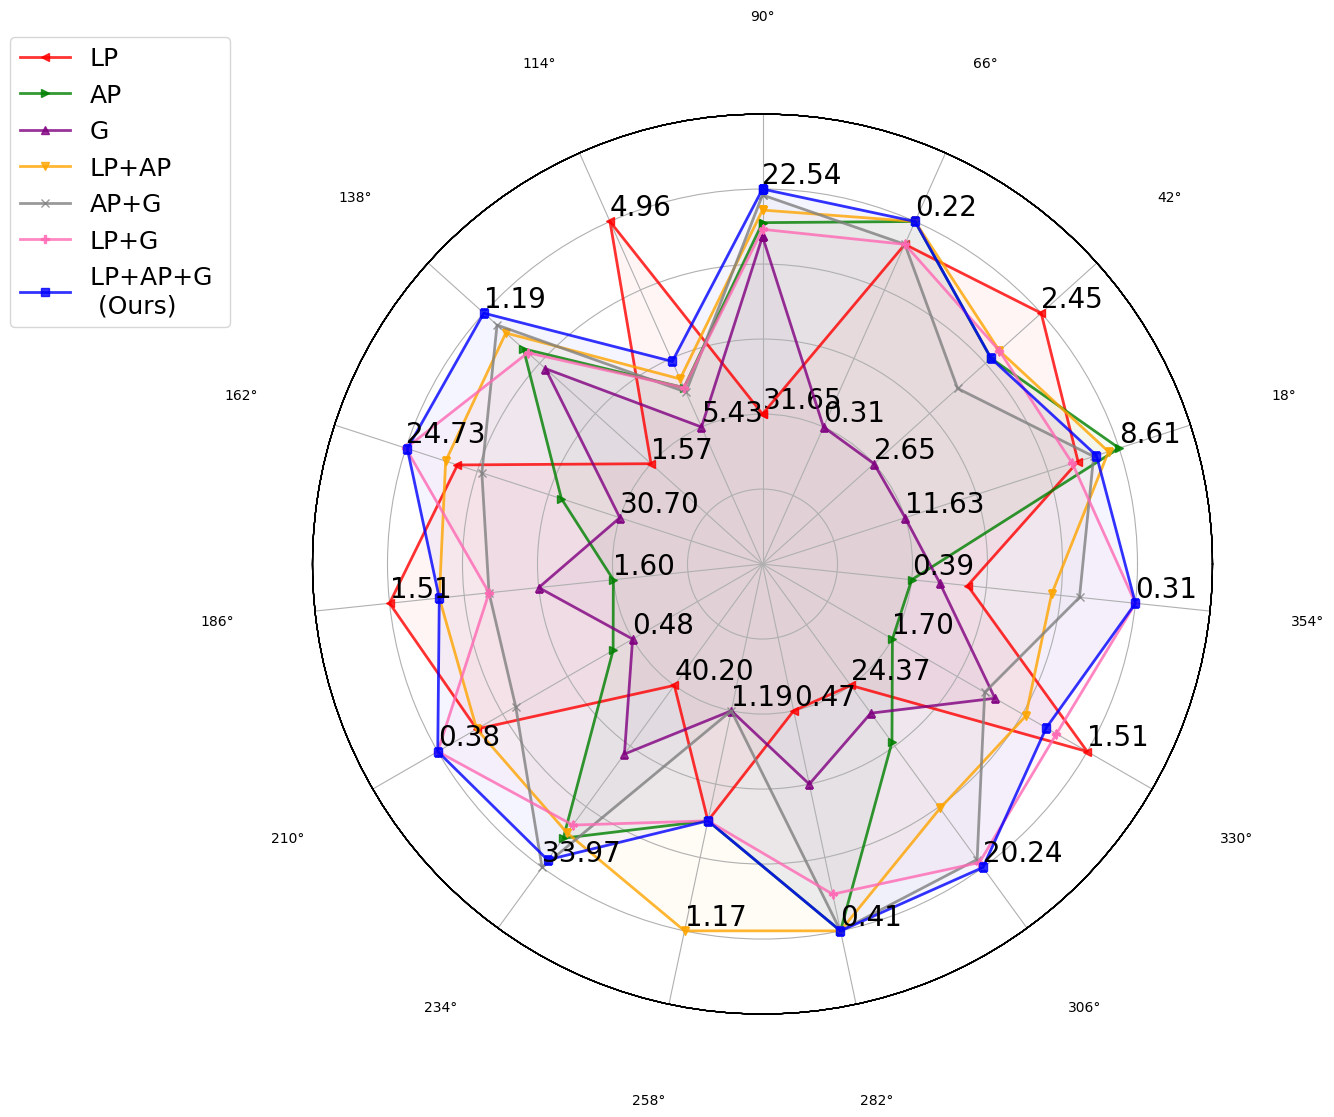

In [6]:
fig = plt.figure(figsize=(10,10))
radar_val = Radar(fig, tit, ring_label_val)



for k, le in enumerate(legends):
    radar_val.plot(data_scale_val_T[k], markers[k], lw=2, color=colors[k], alpha=0.8, label=le)

radar_val.ax.legend(loc='upper left', bbox_to_anchor=(-0.35, 0.0, 0.0, 1.1), fontsize=18)